In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip! install qiskit[quantum_info]

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

qc.save_density_matrix()

In [ ]:
sim = AerSimulator(method = "density_matrix")

tcirc = transpile(qc, sim)
res = sim.run(tcirc).result()
density_matrix = res.data(0)['density_matrix']

print ("Density matrix of bell state:")
print(density_matrix)

Density matrix of bell state:
DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import DensityMatrix, partial_trace, entropy

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.save_density_matrix()

In [ ]:
sim = AerSimulator( method = "density_matrix" )
result = sim.run(qc).result()
dm = result.data(0)[ "density_matrix" ]

In [ ]:
# Create DensityMatrix object of full system
rho = DensityMatrix( dm )
# Compute reduced density matrix of qubit-0 by tracing out qubit-1
reduced_rho = partial_trace( rho, [1] )
# Calculate von Neumann entropy of the reduced state

In [ ]:
S_whole = entropy (rho, base = 2)
S_single = entropy( reduced_rho,base = 2)

print("Entropy of which two qubits system (bits): ", S_whole)
print("Entropy of which two qubits system (bits): ", S_single)

Entropy of which two qubits system (bits):  4.199997326979098e-15
Entropy of which two qubits system (bits):  1.0


In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=51b133254700168ccaf02e191efa6b65897dde86f4ed636c24b35b1f8f53af79
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bit_flip_code_with_syndrome( bit_flip_error = False, error_qubit = 1):
  qc = QuantumCircuit( 5,2 )
  qc.h(0)
  qc.barrier()

  qc.cx( 0,1 )
  qc.cx( 0,2 )
  qc.barrier()

  if bit_flip_error:
    qc.x( error_qubit )
  qc.barrier()

  #syndrome measurement
  qc.cx( 0,3 )
  qc.cx( 1,3 )

  qc.cx( 1,4 )
  qc.cx( 2,4 )

  qc.measure( [3,4] ,[1,2] )

In [ ]:
def bit_flip_code_with_syndrome( bit_flip_error = False, error_qubit = 1):
  qc = QuantumCircuit( 5,2 )
  qc.h(0)
  qc.barrier()

  qc.cx( 0,2 )
  qc.cx( 0,2 )
  qc.barrier()

  qc.h([0,1,2])

  if bit_flip_error:
    qc.x( error_qubit )
  qc.barrier()

  qc.h([0,1,2])

  #syndrome measurement
  qc.cx( 0,3 )
  qc.cx( 1,3 )
  qc.cx( 1,4 )
  qc.cx( 2,4 )

  qc.measure( [3,4] ,[1,2] )

  Simulator = AerSimulator()

  qc_phase_flip = phase_flip_code_with_syndrome(phase_flip_error = True, error_qubit = 1)
  compiled_phase = transpile( qc_phase_flip, simulator )
  result_phase_flip = simulator.run( compiled_phase_flip, shots = 1024 ).result()
  counts_phase_flip = result_phase_flip.get_counts()

  fig, axs = plt.subplots(1,2, figsize = (12,4))
  plot_histogram( counts_bit_flip,
                 ax = axs[0],
                  title = "Phase flip code syndrome")

  plt.show()

In [ ]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def mach_zehnder_interferometer(phase_shift = 0):
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.rz(phase_shift, 0)
    qc.h(0)
    qc.measure(0, 0)
    return qc

In [ ]:
simulator = AerSimulator()

phase_shifts = np.linspace(0, 2 * np.pi, 10)
results = []
legend_labels = []
for phase_shift in phase_shifts:
    qc = mach_zehnder_interferometer(phase_shift = phase_shift)
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots = 1024)
    counts = job.result().get_counts()
    results.append(counts)
    legend_labels.append(f"Phase shift: {phase_shift:.2f}")
    print(f"Phase shift: {phase_shift:.2f}")

Phase shift: 0.00
Phase shift: 0.70
Phase shift: 1.40
Phase shift: 2.09
Phase shift: 2.79
Phase shift: 3.49
Phase shift: 4.19
Phase shift: 4.89
Phase shift: 5.59
Phase shift: 6.28


Phase shift: 0.00 -> Counts: {'0': 1024}
Phase shift: 0.70 -> Counts: {'0': 912, '1': 112}
Phase shift: 1.40 -> Counts: {'1': 454, '0': 570}
Phase shift: 2.09 -> Counts: {'0': 234, '1': 790}
Phase shift: 2.79 -> Counts: {'0': 35, '1': 989}
Phase shift: 3.49 -> Counts: {'0': 26, '1': 998}
Phase shift: 4.19 -> Counts: {'0': 233, '1': 791}
Phase shift: 4.89 -> Counts: {'0': 606, '1': 418}
Phase shift: 5.59 -> Counts: {'1': 114, '0': 910}
Phase shift: 6.28 -> Counts: {'0': 1024}


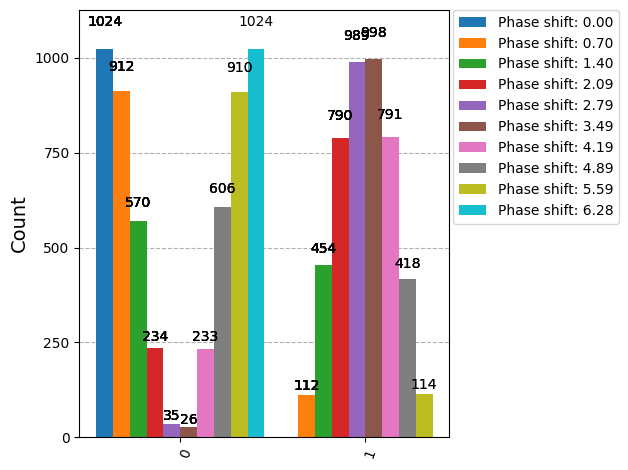

In [ ]:
phase_shifts = np.linspace(0, 2 * np.pi, 10)
results = []
legend_labels = []

for phase in phase_shifts:
  qc = mach_zehnder_interferometer(phase_shift = phase)
  compiled_circuit = transpile(qc, simulator)
  job = simulator.run(compiled_circuit, shots = 1024)
  counts = job.result().get_counts()
  results.append(counts)
  legend_labels.append(f"Phase shift: {phase:.2f}")
  print(f"Phase shift: {phase:.2f} -> Counts: {counts}")

  fig=plot_histogram(results,legend=legend_labels)
fig